In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.optimize as opt
import scipy.signal as scisig
import analysis_utils as au
import importlib

In [6]:
path = 'D:/Lab Data/lorentz_force/sphere_20250318/20250319/Perm mag/2.5 V/nomag ('
files = [1, 2, 3, 4, 5]
end = ').mat'
peak_height = []
PSDs = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    dt = data['Tinterval'][0][0]
    for i in range(int(len(tt)/10**5)):
        PSD = scisig.welch(tt[i*10**5:(i+1)*10**5], fs=1/dt, nperseg=int(1/dt/10))
        peak_height.append(PSD[1][5300])
    PSD = scisig.welch(tt, fs=1/dt, nperseg=int(1/dt/10))
    PSDs.append(PSD[1])
freq = PSD[0]

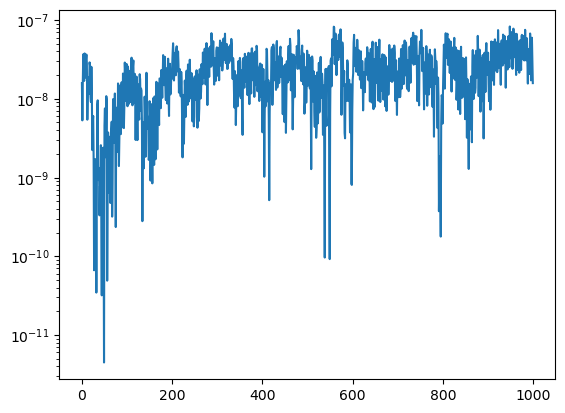

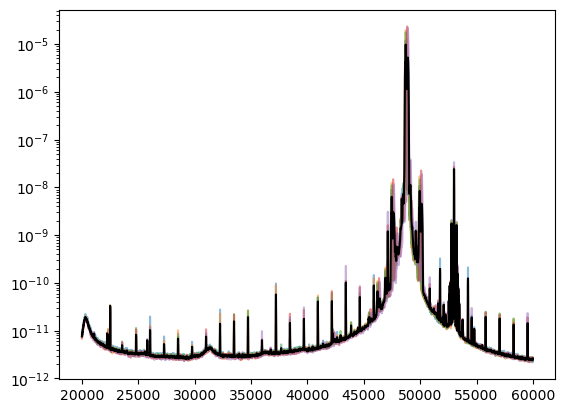

In [7]:
plt.plot(peak_height)
plt.yscale('log')
lb = 2000
ub = 6000
plt.figure()
for PSD in PSDs:
    plt.plot(freq[lb:ub], PSD[lb:ub], alpha = 0.5)
plt.plot(freq[lb:ub], np.mean(PSDs, axis=0)[lb:ub], 'k')
plt.yscale('log')

In [8]:
path = 'D:/Lab Data/lorentz_force/sphere_20250318/20250319/Perm mag/2.5 V/mag ('
files = [1, 2, 3, 4, 5]
end = ').mat'
peak_height2 = []
PSDs2 = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    dt = data['Tinterval'][0][0]
    for i in range(int(len(tt)/10**5)):
        PSD = scisig.welch(tt[i*10**5:(i+1)*10**5], fs=1/dt, nperseg=int(1/dt/10))
        peak_height2.append(PSD[1][5300])
    PSD = scisig.welch(tt, fs=1/dt, nperseg=int(1/dt/10))
    PSDs2.append(PSD[1])
freq = PSD[0]

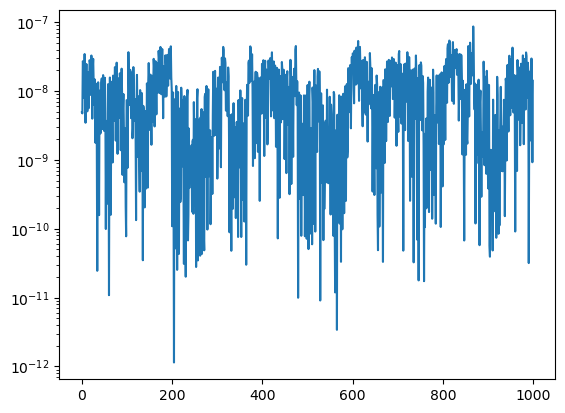

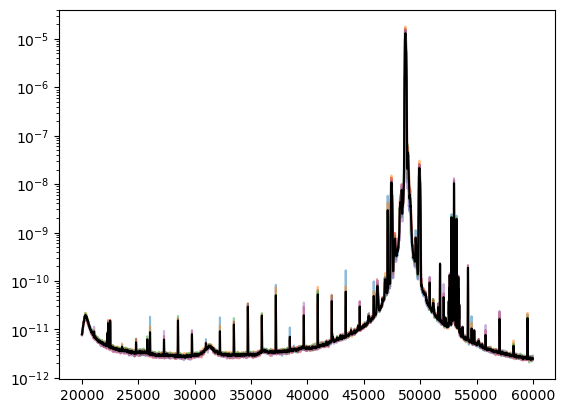

In [13]:
plt.plot(peak_height2)
plt.yscale('log')
lb = 2000
ub = 6000
plt.figure()
for PSD in PSDs2:
    plt.plot(freq[lb:ub], PSD[lb:ub], alpha = 0.5)
plt.plot(freq[lb:ub], np.mean(PSDs2, axis=0)[lb:ub], 'k')
plt.yscale('log')

In [14]:
path = 'D:/Lab Data/lorentz_force/sphere_20250318/20250319/Perm mag/2.5 V/nomag2 ('
files = [1, 2, 3, 4, 5]
end = ').mat'
peak_height3 = []
PSDs3 = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    dt = data['Tinterval'][0][0]
    for i in range(int(len(tt)/10**5)):
        PSD = scisig.welch(tt[i*10**5:(i+1)*10**5], fs=1/dt, nperseg=int(1/dt/10))
        peak_height3.append(PSD[1][5300])
    PSD = scisig.welch(tt, fs=1/dt, nperseg=int(1/dt/10))
    PSDs3.append(PSD[1])
freq = PSD[0]

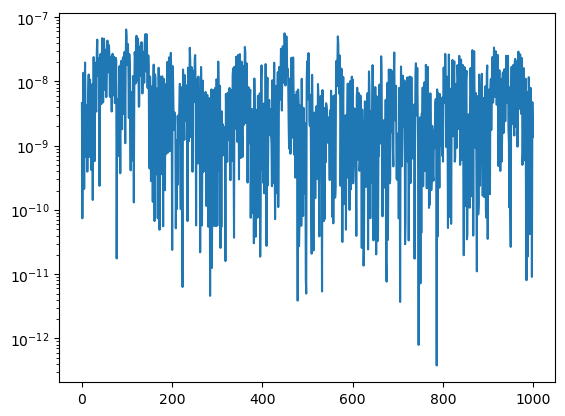

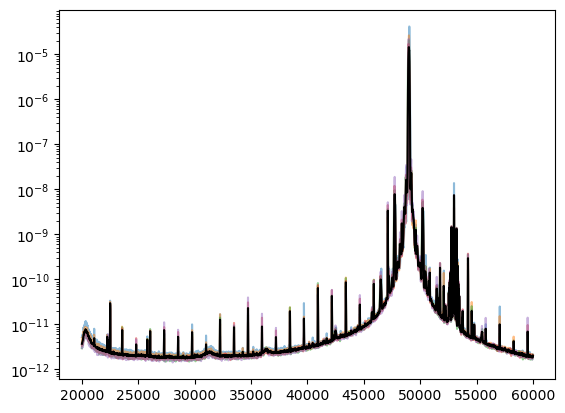

In [15]:
plt.plot(peak_height3)
plt.yscale('log')
lb = 2000
ub = 6000
plt.figure()
for PSD in PSDs3:
    plt.plot(freq[lb:ub], PSD[lb:ub], alpha = 0.5)
plt.plot(freq[lb:ub], np.mean(PSDs3, axis=0)[lb:ub], 'k')
plt.yscale('log')

In [16]:
print(np.mean(peak_height))
print(np.mean(peak_height2))
print(np.mean(peak_height3))

2.3992389e-08
1.04322035e-08
7.4033224e-09


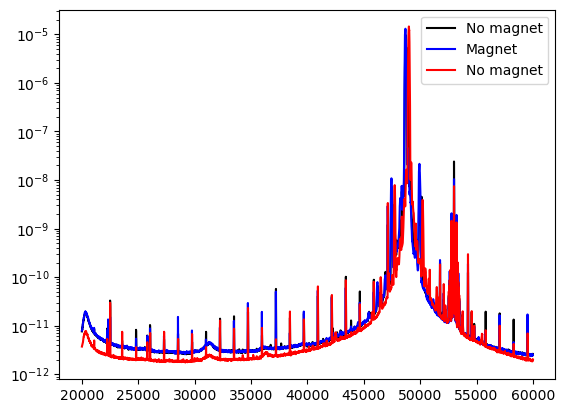

In [19]:

lb = 2000
ub = 6000
plt.figure()
plt.plot(freq[lb:ub], np.mean(PSDs, axis=0)[lb:ub], 'k', label = 'No magnet')
plt.plot(freq[lb:ub], np.mean(PSDs2, axis=0)[lb:ub], 'b', label = 'Magnet')
plt.plot(freq[lb:ub], np.mean(PSDs3, axis=0)[lb:ub], 'r', label = 'No magnet')
plt.yscale('log')
plt.legend()

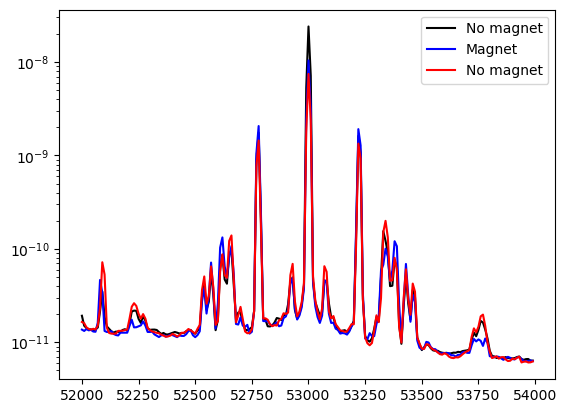

In [25]:

lb = 5200
ub = 5400
plt.figure()
plt.plot(freq[lb:ub], np.mean(PSDs, axis=0)[lb:ub], 'k', label = 'No magnet')
plt.plot(freq[lb:ub], np.mean(PSDs2, axis=0)[lb:ub], 'b', label = 'Magnet')
plt.plot(freq[lb:ub], np.mean(PSDs3, axis=0)[lb:ub], 'r', label = 'No magnet')
plt.yscale('log')
plt.legend()

In [87]:

path = 'D:/Lab Data/lorentz_force/sphere_20250318/20250319/Perm mag/2.5 V/nomag ('
files = [1, 2, 3, 4, 5]
end = ').mat'

phis = []
Rs = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    ref = np.transpose(data['F'])[0]
    dt = data['Tinterval'][0][0]

    time, R2, theta, R2_filt, theta_filt = au.lockin(ref-np.mean(ref), fs = int(1/dt), demod_freq = 53000, BW_pre = 0, BW = 100, BW2 = 1, mode = 'R')
    demod = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:])
    demod2 = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:]+np.pi/2)
    tt_filt = au.butter_bandpass_filter(tt[1:], 53000-100, 53000+100, fs = int(1/dt), order = 3)
    X_tt = tt_filt[:]*demod
    Y_tt = tt_filt[:]*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, 10, fs = int(1/dt), order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, 10, fs = int(1/dt), order = 3)
    phi= -2*np.arctan(X_tt_filt[1:]/Y_tt_filt[1:])
    R = np.sqrt(X_tt_filt[1:]**2+Y_tt_filt[1:]**2)
    for j in range(5):
        step = int(len(phi -100000)/5)
        phi_mean = np.mean(phi[100000+j*step:100000+(j+1)*step])
        R_mean = np.mean(R[100000+j*step:100000+(j+1)*step])
        phis.append(phi_mean)
        Rs.append(R_mean)
print(step/10**6)

path = 'D:/Lab Data/lorentz_force/sphere_20250318/20250319/Perm mag/2.5 V/mag ('
files = [1, 2, 3, 4, 5]
end = ').mat'

phis2 = []
Rs2 = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    ref = np.transpose(data['F'])[0]
    dt = data['Tinterval'][0][0]

    time, R2, theta, R2_filt, theta_filt = au.lockin(ref-np.mean(ref), fs = int(1/dt), demod_freq = 53000, BW_pre = 0, BW = 100, BW2 = 1, mode = 'R')
    demod = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:])
    demod2 = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:]+np.pi/2)
    tt_filt = au.butter_bandpass_filter(tt[1:], 53000-100, 53000+100, fs = int(1/dt), order = 3)
    X_tt = tt_filt[:]*demod
    Y_tt = tt_filt[:]*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, 10, fs = int(1/dt), order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, 10, fs = int(1/dt), order = 3)
    phi= -2*np.arctan(X_tt_filt[1:]/Y_tt_filt[1:])
    R = np.sqrt(X_tt_filt[1:]**2+Y_tt_filt[1:]**2)
    for j in range(5):
        step = int(len(phi -100000)/5)
        phi_mean = np.mean(phi[100000+j*step:100000+(j+1)*step])
        R_mean = np.mean(R[100000+j*step:100000+(j+1)*step])
        phis2.append(phi_mean)
        Rs2.append(R_mean)
print(step/10**6)

path = 'D:/Lab Data/lorentz_force/sphere_20250318/20250319/Perm mag/2.5 V/nomag2 ('
files = [1, 2, 3, 4, 5]
end = ').mat'

phis3 = []
Rs3 = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    ref = np.transpose(data['F'])[0]
    dt = data['Tinterval'][0][0]

    time, R2, theta, R2_filt, theta_filt = au.lockin(ref-np.mean(ref), fs = int(1/dt), demod_freq = 53000, BW_pre = 0, BW = 100, BW2 = 1, mode = 'R')
    demod = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:])
    demod2 = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:]+np.pi/2)
    tt_filt = au.butter_bandpass_filter(tt[1:], 53000-100, 53000+100, fs = int(1/dt), order = 3)
    X_tt = tt_filt[:]*demod
    Y_tt = tt_filt[:]*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, 10, fs = int(1/dt), order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, 10, fs = int(1/dt), order = 3)
    phi= -2*np.arctan(X_tt_filt[1:]/Y_tt_filt[1:])
    R = np.sqrt(X_tt_filt[1:]**2+Y_tt_filt[1:]**2)
    for j in range(5):
        step = int(len(phi -100000)/5)
        phi_mean = np.mean(phi[100000+j*step:100000+(j+1)*step])
        R_mean = np.mean(R[100000+j*step:100000+(j+1)*step])
        phis3.append(phi_mean)
        Rs3.append(R_mean)
print(step/10**6)

3.999999
3.999999
3.999999


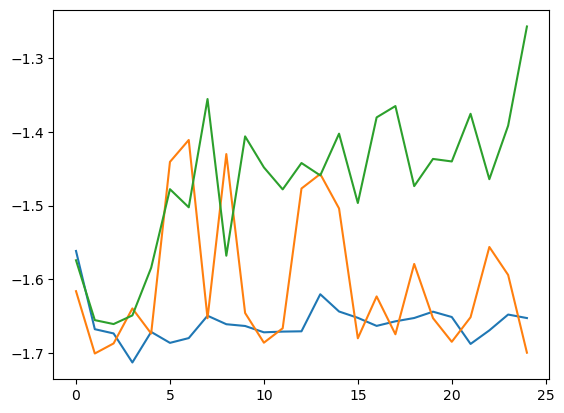

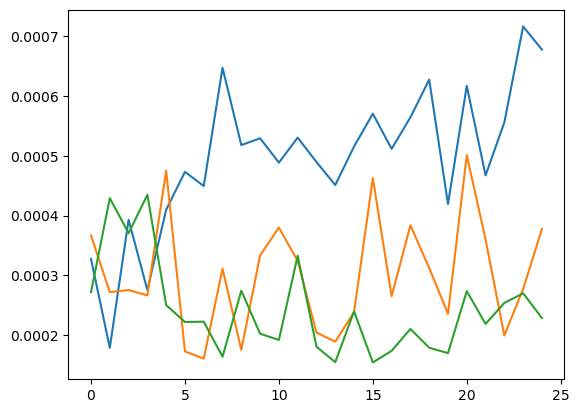

In [88]:
plt.plot(phis)
plt.plot(phis2)
plt.plot(phis3)
plt.figure()
plt.plot(Rs)
plt.plot(Rs2)
plt.plot(Rs3)

In [74]:
path = 'D:/Lab Data/lorentz_force/sphere_20250318/20250319/Perm mag/2.5 V/nomag ('
files = [1]
end = ').mat'

phis = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    ref = np.transpose(data['F'])[0]
    dt = data['Tinterval'][0][0]

    time, R2, theta, R2_filt, theta_filt = au.lockin(ref-np.mean(ref), fs = int(1/dt), demod_freq = 53000, BW_pre = 0, BW = 100, BW2 = 1, mode = 'R')
    demod = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:])
    demod2 = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:]+np.pi/2)
    tt_filt = au.butter_bandpass_filter(tt[1:], 53000-100, 53000+100, fs = int(1/dt), order = 3)
    X_tt = tt_filt[:]*demod
    Y_tt = tt_filt[:]*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, 10, fs = int(1/dt), order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, 10, fs = int(1/dt), order = 3)
    phi= -2*np.arctan(X_tt_filt[1:]/Y_tt_filt[1:])
    R = np.sqrt(X_tt_filt[1:]**2+Y_tt_filt[1:]**2)
    for j in range(5):
        step = int(len(phi -100000)/5)
        phi_mean = np.mean(phi[100000+j*step:100000+(j+1)*step])
        phis.append(phi_mean)
print(step/10**6)

3.999999


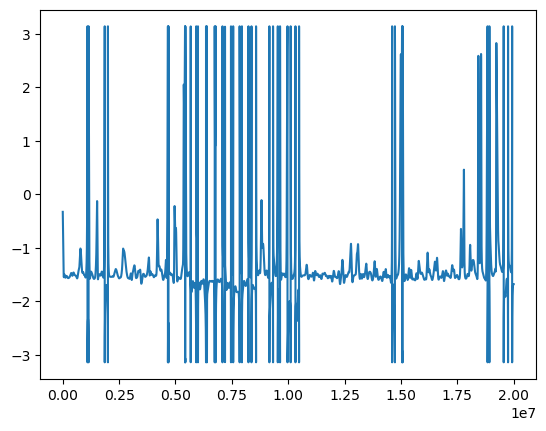

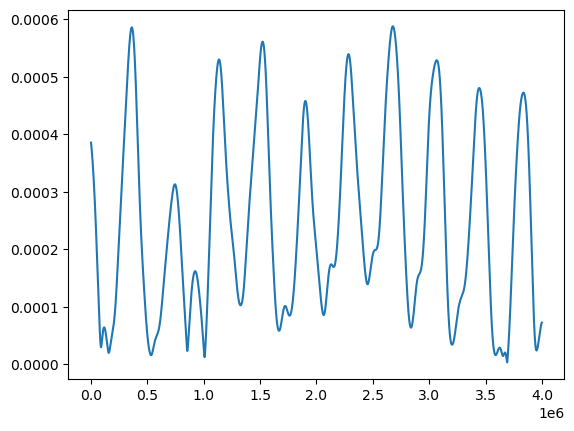

In [84]:
plt.plot(phi)
plt.figure()
plt.plot(R[1000000:5000000])

In [86]:
dt

9.999999974752427e-07